In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path

In [2]:
GD = Path('/Users/mgjeon/Library/CloudStorage/GoogleDrive-A/My Drive/Notes/Work/PINN/')
NAS = Path('/Volumes/drive/Research/SSWLAB/NF2')

# Energy

In [3]:
csvmine = GD / Path('ar_series_377_2011-02-12T00:00:00/energy.csv')
df_mine = pd.read_csv(csvmine, index_col=False)
bin = 2
cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3
energy_mine = (df_mine['energy_density']*dV)/1e33
date_mine = df_mine['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [4]:
csv01 = NAS / Path('NF2_DB/author/series_01.csv')
df01 = pd.read_csv(csv01, index_col=False)
energy_01 = df01[' E (10^33 erg)']
date_01 = df01['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [5]:
csv1 = NAS / Path('NF2_DB/author/series_1.csv')
df1 = pd.read_csv(csv1, index_col=False)
energy_1 = df1[' E (10^33 erg)']
date_1 = df1['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [6]:
csvwb1 = NAS / Path('NF2_DB/author/series_wb1.csv')
dfwb1 = pd.read_csv(csvwb1, index_col=False)
energy_wb1 = dfwb1[' E (10^33 erg)']
date_wb1 = dfwb1['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [7]:
csvwb2 = NAS / Path('NF2_DB/author/series_wb2.csv')
dfwb2 = pd.read_csv(csvwb2, index_col=False)
energy_wb2 = dfwb2[' E (10^33 erg)']
date_wb2 = dfwb2['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [8]:
csvKusano = NAS / Path('NOAA11158/NOAA11158_Kusano.csv')
dfKusano = pd.read_csv(csvKusano, index_col=False)
dx_Mm = dfKusano['dx'][0]
dy_Mm = dfKusano['dy'][0]
dz_Mm = dfKusano['dz'][0]
dx_cm = dx_Mm*1e8
dy_cm = dy_Mm*1e8
dz_cm = dz_Mm*1e8
dV_cm3 = dx_cm*dy_cm*dz_cm
energy_Kusano = (dfKusano['energy_density']*dV_cm3)/1e33
date_Kusano = dfKusano['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

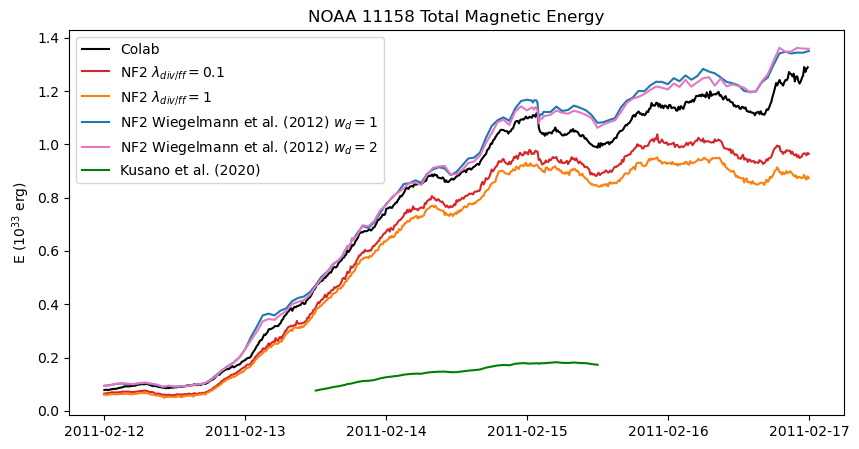

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine, label='Colab', color='k')
plt.plot(date_01, energy_01, label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
plt.plot(date_1, energy_1, label=r'NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, energy_wb1, label=r'NF2 Wiegelmann et al. (2012) $w_d = 1$', color='#1f77b4')
plt.plot(date_wb2, energy_wb2, label=r'NF2 Wiegelmann et al. (2012) $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, energy_Kusano, label=r'Kusano et al. (2020)', color='g')
plt.title('NOAA 11158 Total Magnetic Energy')
plt.ylabel(r'E ($10^{33}$ erg)')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_energy.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

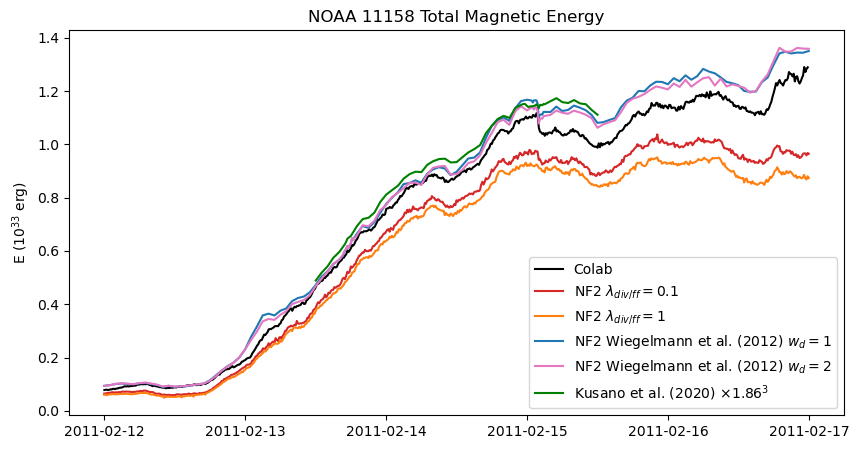

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine, label='Colab', color='k')
plt.plot(date_01, energy_01, label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
plt.plot(date_1, energy_1, label=r'NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, energy_wb1, label=r'NF2 Wiegelmann et al. (2012) $w_d = 1$', color='#1f77b4')
plt.plot(date_wb2, energy_wb2, label=r'NF2 Wiegelmann et al. (2012) $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, energy_Kusano*(1.86**3), label=r'Kusano et al. (2020) $\times 1.86^3$', color='g')
plt.title('NOAA 11158 Total Magnetic Energy')
plt.ylabel(r'E ($10^{33}$ erg)')
plt.legend(loc='lower right')
figure_energy_path = NAS / 'NOAA11158/11158_energy_Kusano8.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

In [11]:
date_mine[date_mine > datetime(2011, 2, 13, 11, 55, 0)]

180   2011-02-13 12:00:00
181   2011-02-13 12:12:00
182   2011-02-13 12:24:00
183   2011-02-13 12:36:00
184   2011-02-13 12:48:00
              ...        
595   2011-02-16 23:00:00
596   2011-02-16 23:12:00
597   2011-02-16 23:24:00
598   2011-02-16 23:36:00
599   2011-02-16 23:48:00
Name: date, Length: 420, dtype: datetime64[ns]

In [12]:
date_01[date_01 > datetime(2011, 2, 13, 11, 55, 0)]

180   2011-02-13 11:58:20
181   2011-02-13 12:10:00
182   2011-02-13 12:23:20
183   2011-02-13 12:35:00
184   2011-02-13 12:46:40
              ...        
596   2011-02-16 23:10:00
597   2011-02-16 23:23:20
598   2011-02-16 23:35:00
599   2011-02-16 23:46:40
600   2011-02-16 23:58:20
Name: TIME (10^9 sec since 1-jan-1979 ), Length: 421, dtype: datetime64[ns]

In [13]:
date_Kusano[date_Kusano > datetime(2011, 2, 13, 11, 55, 0)]

0    2011-02-13 12:00:00
1    2011-02-13 13:00:00
2    2011-02-13 14:00:00
3    2011-02-13 15:00:00
4    2011-02-13 16:00:00
             ...        
61   2011-02-15 08:00:00
62   2011-02-15 09:00:00
63   2011-02-15 10:00:00
64   2011-02-15 11:00:00
65   2011-02-15 12:00:00
Name: date, Length: 66, dtype: datetime64[ns]

In [14]:
date_wb1[date_wb1 > datetime(2011, 2, 13, 11, 55, 0)]

36    2011-02-13 11:58:20
37    2011-02-13 12:58:20
38    2011-02-13 13:58:20
39    2011-02-13 14:58:20
40    2011-02-13 15:58:20
              ...        
134   2011-02-16 19:58:20
135   2011-02-16 20:58:20
136   2011-02-16 21:58:20
137   2011-02-16 22:58:20
138   2011-02-16 23:58:20
Name: TIME (10^9 sec since 1-jan-1979 ), Length: 103, dtype: datetime64[ns]

In [15]:
energy_mine = np.array(energy_mine)
energy_01 = np.array(energy_01)
energy_1 = np.array(energy_1)
energy_wb1 = np.array(energy_wb1)
energy_wb2 = np.array(energy_wb2)
energy_Kusano = np.array(energy_Kusano)

In [16]:
print(energy_mine[180], energy_01[180], energy_1[180], energy_wb1[36], energy_wb2[36], energy_Kusano[0])
print(date_mine[180], date_01[180], date_1[180], date_wb1[36], date_wb2[36], date_Kusano[0])

0.4640806628352 0.3857829 0.37323692 0.47167501 0.46746701 0.07593122581374653
2011-02-13 12:00:00 2011-02-13 11:58:20 2011-02-13 11:58:20 2011-02-13 11:58:20 2011-02-13 11:58:20 2011-02-13 12:00:00


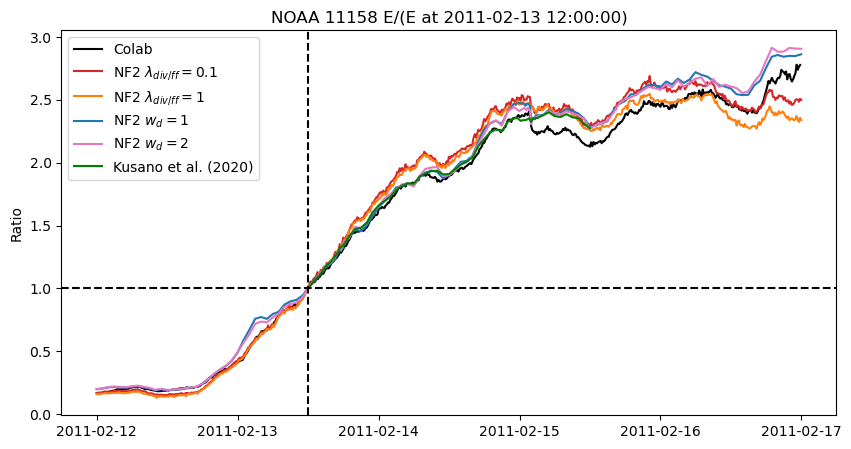

In [17]:
# Kusano NLFFF가 2011-02-13 12:00:00부터 데이터가 존재함
# 각자의 2011-02-13 12:00:00에서의 에너지로 자신의 에너지값을 나눈 값을 plot함

plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine/energy_mine[180], label='Colab', color='k')
plt.plot(date_01, energy_01/energy_01[180], label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
plt.plot(date_1, energy_1/energy_1[180], label='NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, energy_wb1/energy_wb1[36], label=r'NF2 $w_d = 1$', color='#1f77b4')
plt.plot(date_wb2, energy_wb2/energy_wb2[36], label=r'NF2 $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, energy_Kusano/energy_Kusano[0], label='Kusano et al. (2020)', color='g')
plt.title('NOAA 11158 E/(E at 2011-02-13 12:00:00)')
plt.ylabel('Ratio')
plt.axvline(date_mine[180], color='k', linestyle='dashed')
plt.axhline(1, color='k', linestyle='dashed')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_energy_normalized_1.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

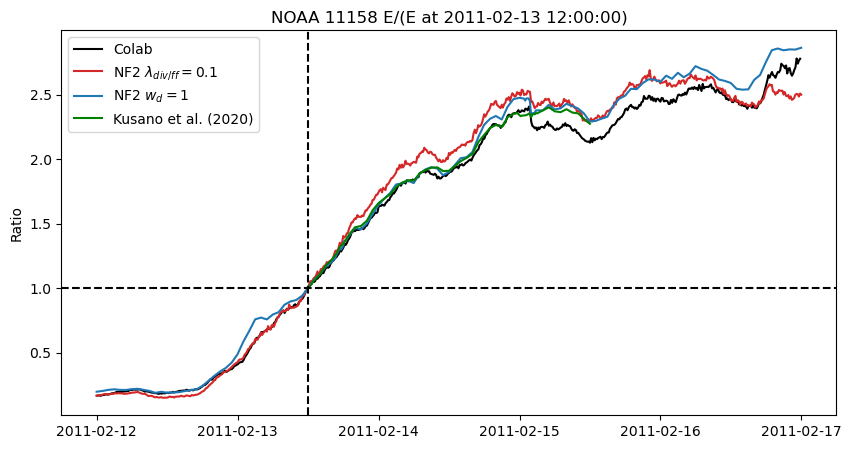

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine, energy_mine/energy_mine[180], label='Colab', color='k')
plt.plot(date_01, energy_01/energy_01[180], label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
#plt.plot(date_1, energy_1/energy_1[180], label='NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, energy_wb1/energy_wb1[36], label=r'NF2 $w_d = 1$', color='#1f77b4')
#plt.plot(date_wb2, energy_wb2/energy_wb2[36], label=r'NF2 $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, energy_Kusano/energy_Kusano[0], label='Kusano et al. (2020)', color='g')
plt.title('NOAA 11158 E/(E at 2011-02-13 12:00:00)')
plt.ylabel('Ratio')
plt.axvline(date_mine[180], color='k', linestyle='dashed')
plt.axhline(1, color='k', linestyle='dashed')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_energy_normalized_2.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

# Free Energy

In [19]:
csvmine_free = GD / Path('ar_series_377_2011-02-12T00:00:00/free_energy.csv')
df_mine_free = pd.read_csv(csvmine_free, index_col=False)
energy_mine_free = (df_mine_free['free_energy_density']*dV)/1e33
date_mine_free = df_mine_free['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [20]:
free_energy_01 = df01[' Ef (10^33 erg)']
free_energy_1 = df1[' Ef (10^33 erg)']
free_energy_wb1 = dfwb1[' Ef (10^33 erg)']
free_energy_wb2 = dfwb2[' Ef (10^33 erg)']
free_energy_Kusano = energy_Kusano - (dfKusano['energy_density_pot']*dV_cm3)/1e33

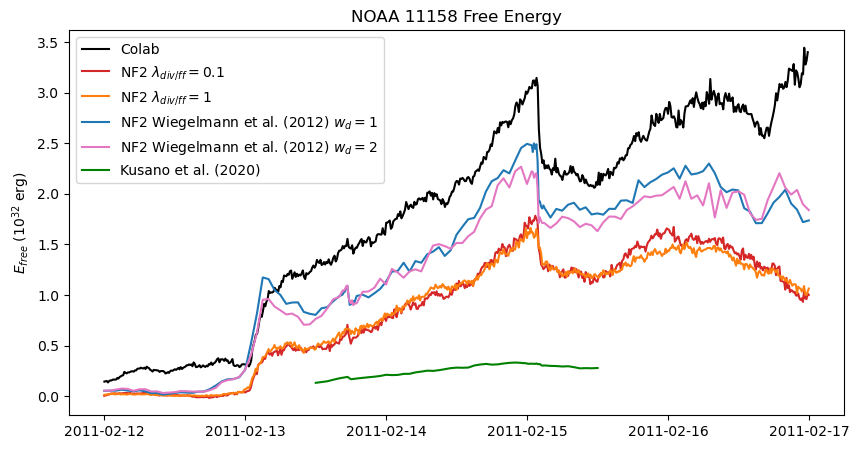

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine_free, energy_mine_free*10, label='Colab', color='k')
plt.plot(date_01, free_energy_01*10, label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
plt.plot(date_1, free_energy_1*10, label=r'NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, free_energy_wb1*10, label=r'NF2 Wiegelmann et al. (2012) $w_d = 1$', color='#1f77b4')
plt.plot(date_wb2, free_energy_wb2*10, label=r'NF2 Wiegelmann et al. (2012) $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, free_energy_Kusano*10, label='Kusano et al. (2020)', color='g')
plt.title('NOAA 11158 Free Energy')
plt.ylabel(r'$E_{free}$ ($10^{32}$ erg)')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_free_energy.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

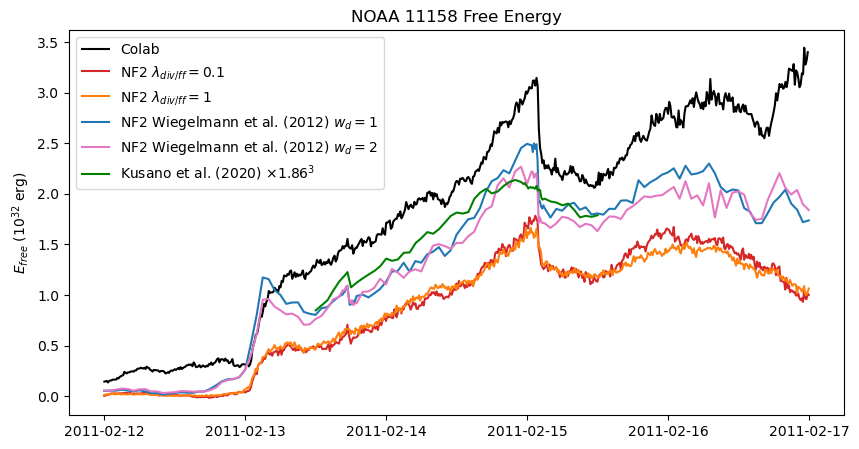

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine_free, energy_mine_free*10, label='Colab', color='k')
plt.plot(date_01, free_energy_01*10, label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
plt.plot(date_1, free_energy_1*10, label=r'NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, free_energy_wb1*10, label=r'NF2 Wiegelmann et al. (2012) $w_d = 1$', color='#1f77b4')
plt.plot(date_wb2, free_energy_wb2*10, label=r'NF2 Wiegelmann et al. (2012) $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, free_energy_Kusano*10*(1.86**3), label=r'Kusano et al. (2020) $\times 1.86^3$', color='g')
plt.title('NOAA 11158 Free Energy')
plt.ylabel(r'$E_{free}$ ($10^{32}$ erg)')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_free_energy_Kusano8.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

In [23]:
energy_mine_free = np.array(energy_mine_free)
free_energy_01 = np.array(free_energy_01)
free_energy_1 = np.array(free_energy_1)
free_energy_wb1 = np.array(free_energy_wb1)
free_energy_wb2 = np.array(free_energy_wb2)
free_energy_Kusano = np.array(free_energy_Kusano)

In [24]:
print(energy_mine_free[180], free_energy_01[180], free_energy_1[180], free_energy_wb1[36], free_energy_wb2[36], free_energy_Kusano[0])
print(date_mine[180], date_01[180], date_1[180], date_wb1[36], date_wb2[36], date_Kusano[0])

0.12912009928704 0.046906285 0.046487898 0.080320604 0.076277032 0.013180687774424063
2011-02-13 12:00:00 2011-02-13 11:58:20 2011-02-13 11:58:20 2011-02-13 11:58:20 2011-02-13 11:58:20 2011-02-13 12:00:00


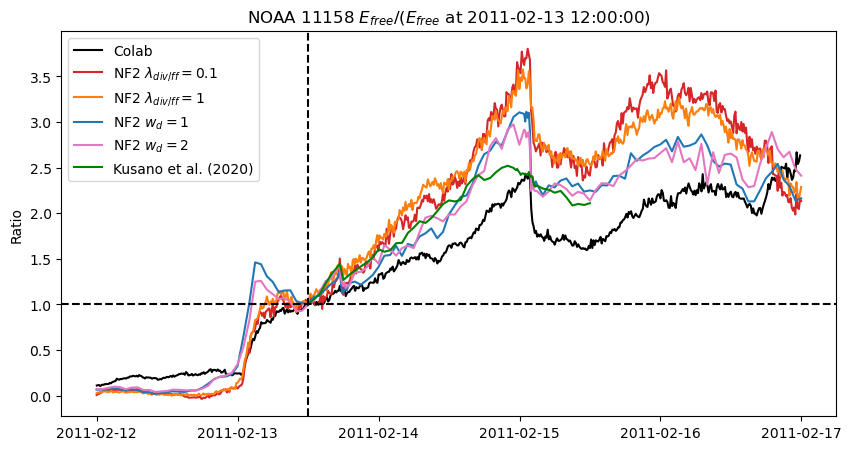

In [25]:
# Kusano NLFFF가 2011-02-13 12:00:00부터 데이터가 존재함
# 각자의 2011-02-13 12:00:00에서의 에너지로 자신의 에너지값을 나눈 값을 plot함

plt.figure(figsize=(10, 5))
plt.plot(date_mine_free, energy_mine_free/energy_mine_free[180], label='Colab', color='k')
plt.plot(date_01, free_energy_01/free_energy_01[180], label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
plt.plot(date_1, free_energy_1/free_energy_1[180], label='NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, free_energy_wb1/free_energy_wb1[36], label=r'NF2 $w_d = 1$', color='#1f77b4')
plt.plot(date_wb2, free_energy_wb2/free_energy_wb2[36], label=r'NF2 $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, free_energy_Kusano/free_energy_Kusano[0], label='Kusano et al. (2020)', color='g')
plt.title(r'NOAA 11158 $E_{free}$/($E_{free}$ at 2011-02-13 12:00:00)')
plt.ylabel('Ratio')
plt.axvline(date_mine[180], color='k', linestyle='dashed')
plt.axhline(1, color='k', linestyle='dashed')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_free_energy_normalized_1.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()

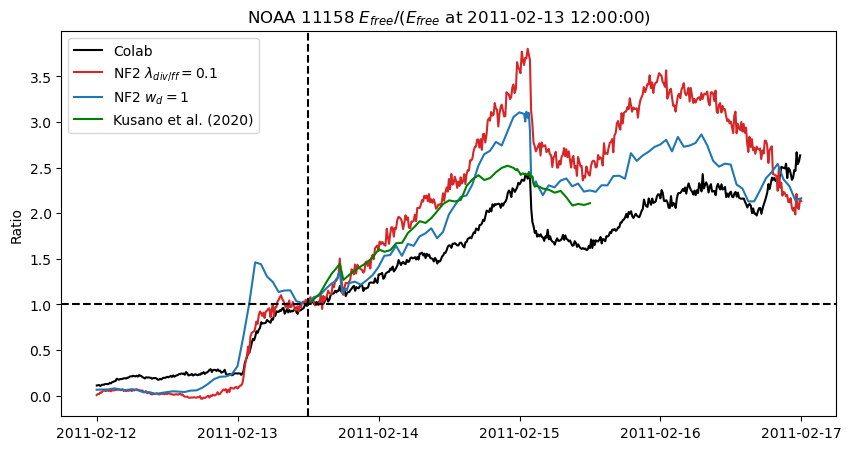

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(date_mine_free, energy_mine_free/energy_mine_free[180], label='Colab', color='k')
plt.plot(date_01, free_energy_01/free_energy_01[180], label=r'NF2 $\lambda_{div/ff} = 0.1$', color='#d62728')
# plt.plot(date_1, free_energy_1/free_energy_1[180], label='NF2 $\lambda_{div/ff} = 1$', color='#ff7f0e')
plt.plot(date_wb1, free_energy_wb1/free_energy_wb1[36], label=r'NF2 $w_d = 1$', color='#1f77b4')
# plt.plot(date_wb2, free_energy_wb2/free_energy_wb2[36], label=r'NF2 $w_d = 2$', color='#e377c2')
plt.plot(date_Kusano, free_energy_Kusano/free_energy_Kusano[0], label='Kusano et al. (2020)', color='g')
plt.title(r'NOAA 11158 $E_{free}$/($E_{free}$ at 2011-02-13 12:00:00)')
plt.ylabel('Ratio')
plt.axvline(date_mine[180], color='k', linestyle='dashed')
plt.axhline(1, color='k', linestyle='dashed')
plt.legend(loc='upper left')
figure_energy_path = NAS / 'NOAA11158/11158_free_energy_normalized_2.png'
plt.savefig(figure_energy_path, dpi=300)
plt.show()